### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [270]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [271]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [272]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

data.isnull().sum()

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [273]:
popular_passanger_count = data['passenger_count'].dropna().mode()[0]

In [274]:
popular_passanger_count.round(2)

930.4

In [275]:
popular_passanger_count

930.3997532751514

In [276]:
data['passenger_count'] = data['passenger_count'].fillna(popular_passanger_count)

In [277]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [278]:
data.isnull().sum()

vendor_id                  0
passenger_count            0
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [279]:
data['distance_km'] = data['distance_km'].fillna(data.groupby(['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'], as_index=False)['distance_km'].transform('mean'))

In [280]:
data.isna().sum()

vendor_id             0
passenger_count       0
store_and_fwd_flag    0
distance_km           0
log_trip_duration     0
anomaly               0
traffic_jam           0
day_of_week_1         0
day_of_week_2         0
day_of_week_3         0
day_of_week_4         0
day_of_week_5         0
day_of_week_6         0
hour_1                0
hour_2                0
hour_3                0
hour_4                0
hour_5                0
hour_6                0
hour_7                0
hour_8                0
hour_9                0
hour_10               0
hour_11               0
hour_12               0
hour_13               0
hour_14               0
hour_15               0
hour_16               0
hour_17               0
hour_18               0
hour_19               0
hour_20               0
hour_21               0
hour_22               0
hour_23               0
month_2               0
month_3               0
month_4               0
month_5               0
month_6               0
dtype: int64

In [281]:
data.head(20).to_csv('solution_7.csv', sep=';', index=False)


### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [282]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [283]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']

losses_train = []
losses_test = []

for train_index, test_index in selector.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)
    
    y_pred_train = model.predict(X_train_cv)
    y_pred_test = model.predict(X_test_cv)
    
    loss_train = np.mean((y_pred_train - y_train_cv) ** 2)
    loss_test = np.mean((y_pred_test - y_test_cv) ** 2)
    
    losses_train.append(loss_train)
    losses_test.append(loss_test)
    
cross_val_error = np.mean(losses_test)

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

{'whiskers': [<matplotlib.lines.Line2D at 0x31da46e10>,
 'caps': [<matplotlib.lines.Line2D at 0x3886001a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x31d9cbd70>],
 'medians': [<matplotlib.lines.Line2D at 0x388600650>],
 'fliers': [<matplotlib.lines.Line2D at 0x388600920>],
 'means': []}

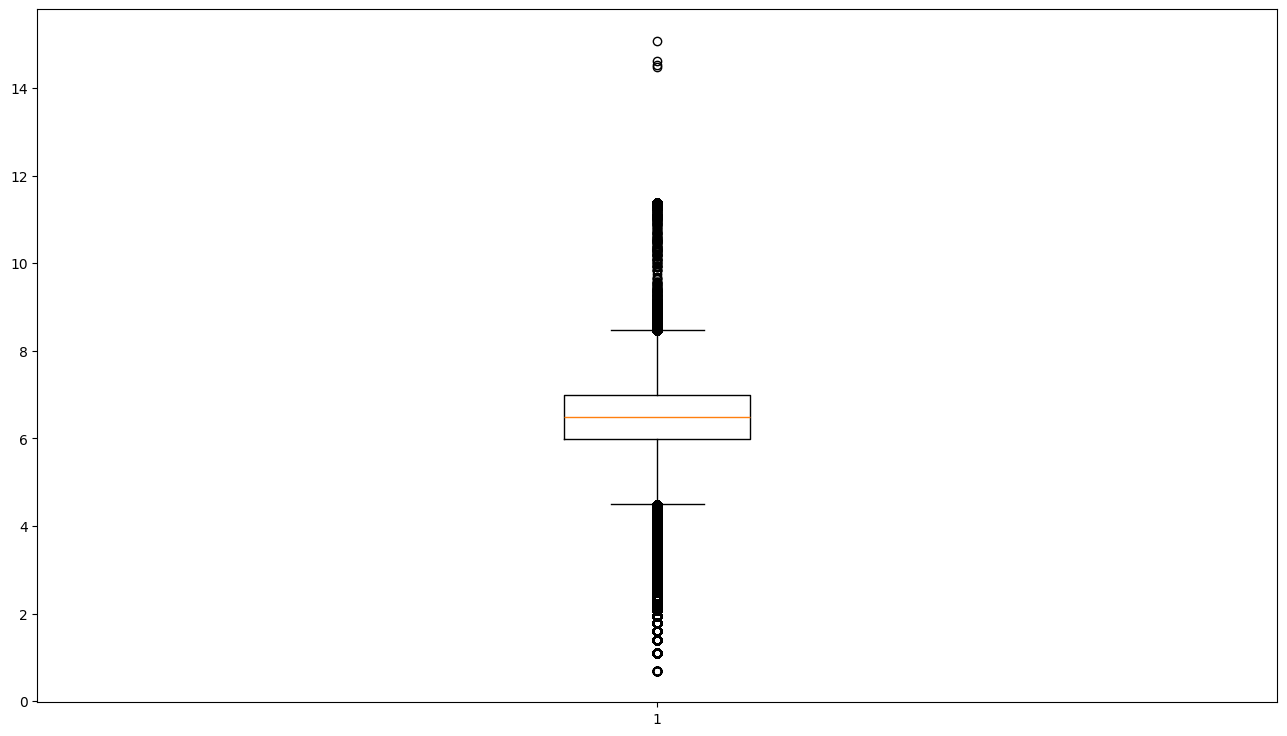

In [284]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9))

plt.boxplot(x=data['log_trip_duration'])

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [285]:
X = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']

lower_bound = np.percentile(y, 0.5)
upper_bound = np.percentile(y, 99.5)

mask = (y > lower_bound) & (y < upper_bound)
X_filtered = X[mask]
y_filtered = y[mask]

{'whiskers': [<matplotlib.lines.Line2D at 0x38d2637a0>,
 'caps': [<matplotlib.lines.Line2D at 0x38d263d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x38d263500>],
 'medians': [<matplotlib.lines.Line2D at 0x38d290200>],
 'fliers': [<matplotlib.lines.Line2D at 0x38d290470>],
 'means': []}

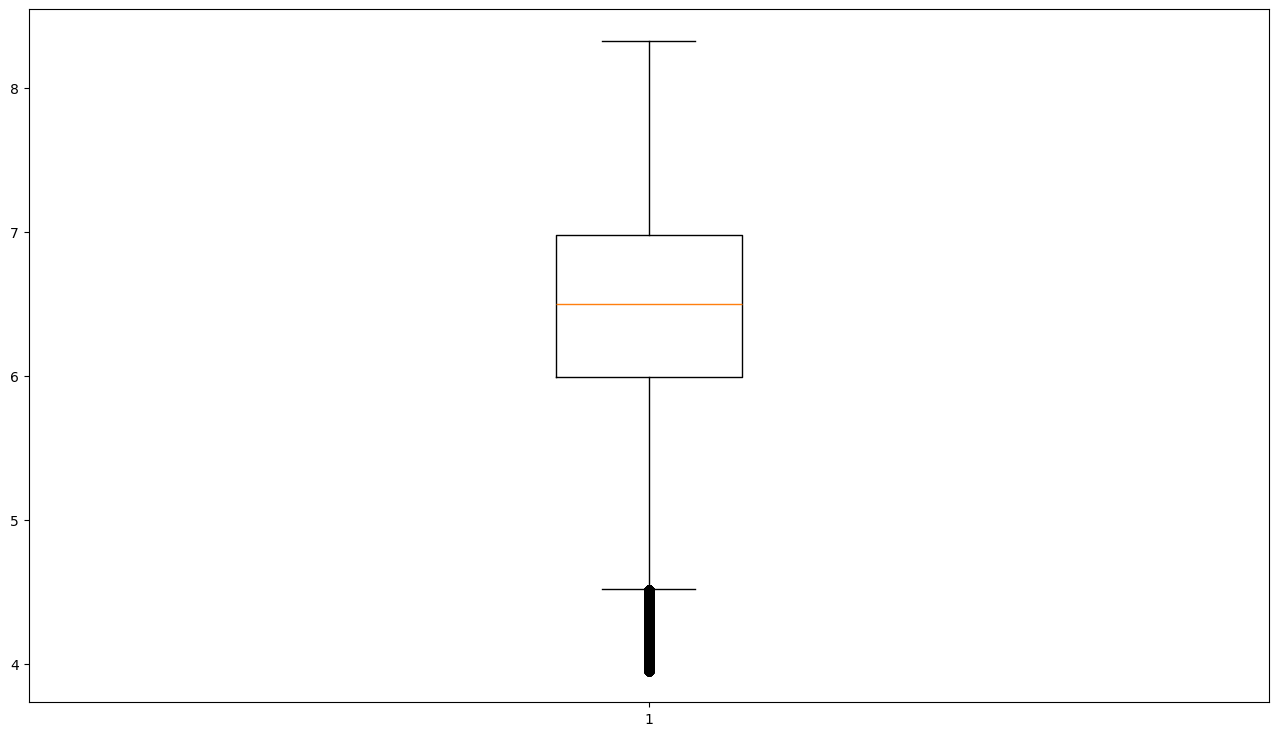

In [286]:
fig = plt.figure(figsize=(16, 9))
plt.boxplot(x=y_filtered)

Снова замерьте качество на кросс-валидации, используя старый selector

In [287]:
losses_train_filtered = []
losses_test_filtered = []

for train_index, test_index in selector.split(X_filtered, y_filtered):
    X_train_cv, X_test_cv = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
    y_train_cv, y_test_cv = y_filtered.iloc[train_index], y_filtered.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)
    
    y_pred_train = model.predict(X_train_cv)
    y_pred_test = model.predict(X_test_cv)
    
    loss_train = np.mean((y_pred_train - y_train_cv) ** 2)
    loss_test = np.mean((y_pred_test - y_test_cv) ** 2)
    
    losses_train_filtered.append(loss_train)
    losses_test_filtered.append(loss_test)
    
cross_val_error_filtered = np.mean(losses_test_filtered)

print(f"MSLE на Кросс-валидации: {round(cross_val_error_filtered, 3)}")

MSLE на Кросс-валидации: 0.35
